In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from volmodels import *
plt.style.use('dark_background')

In [2]:
params = {
    'font.size': 14,
    'figure.figsize': (11,18),
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
}
plt.rcParams.update(params)

In [3]:
T = 1.0
ONE_BP = 1e-4
ONE_PCT = 1e-2
N_STRIKES = 100

## Black-Scholes model with latent Markov volatility
The model starts with a flat volatility at $\sigma_0$ which can jump once to a different value $\sigma_1, ..., \sigma_n$ with intensity $\lambda_1, ..., \lambda_n$. 


By Markov chain properties, these jumps are independent and distributed exponentially with parameter $\lambda_1, ..., \lambda_n$. Therefore, the call price in this model is the average of the call prices in the simple latent model with only one choice of volatility $\sigma_i$, weighted by the probability that the jump to $\sigma_i$ occurs first. A simple calculation gives, with $T_i$ being the jump time of $\sigma_i$ :
$$
P(T_i = min_{j=1,...,n} T_j) = \frac{\lambda_i}{\sum_{j=1}^n \lambda_j}
$$


Compared to the usual Black-Scholes model, the hidden variable creates a volatility smile.


In [4]:
f = 100.0
sigma_0 = 20*ONE_PCT
sigmas = [10*ONE_PCT, 60*ONE_PCT]

sigma_0_N = 20*ONE_PCT*f
sigmas_N = [10*ONE_PCT*f, 60*ONE_PCT*f]

lambdas = [0.5, 1.0]
K_lo = 80.0
K_hi = 120.0

In [5]:
Model_BS = BS_Markov_LN(sigma_0=sigma_0,
                        sigmas=sigmas,
                        lambdas=lambdas,
                        f=f,
                        n_strikes=N_STRIKES,
                        K_lo=K_lo,
                        K_hi=K_hi,
                        strike_type='strike',
                       )

Model_Bachelier = Bachelier_Markov_N(sigma_0=sigma_0_N,
                                     sigmas=sigmas_N,
                                     lambdas=lambdas,
                                     f=f,
                                     n_strikes=N_STRIKES,
                                     K_lo=K_lo,
                                     K_hi=K_hi,
                                     strike_type='strike',
                                    )

## Implied volatility smile

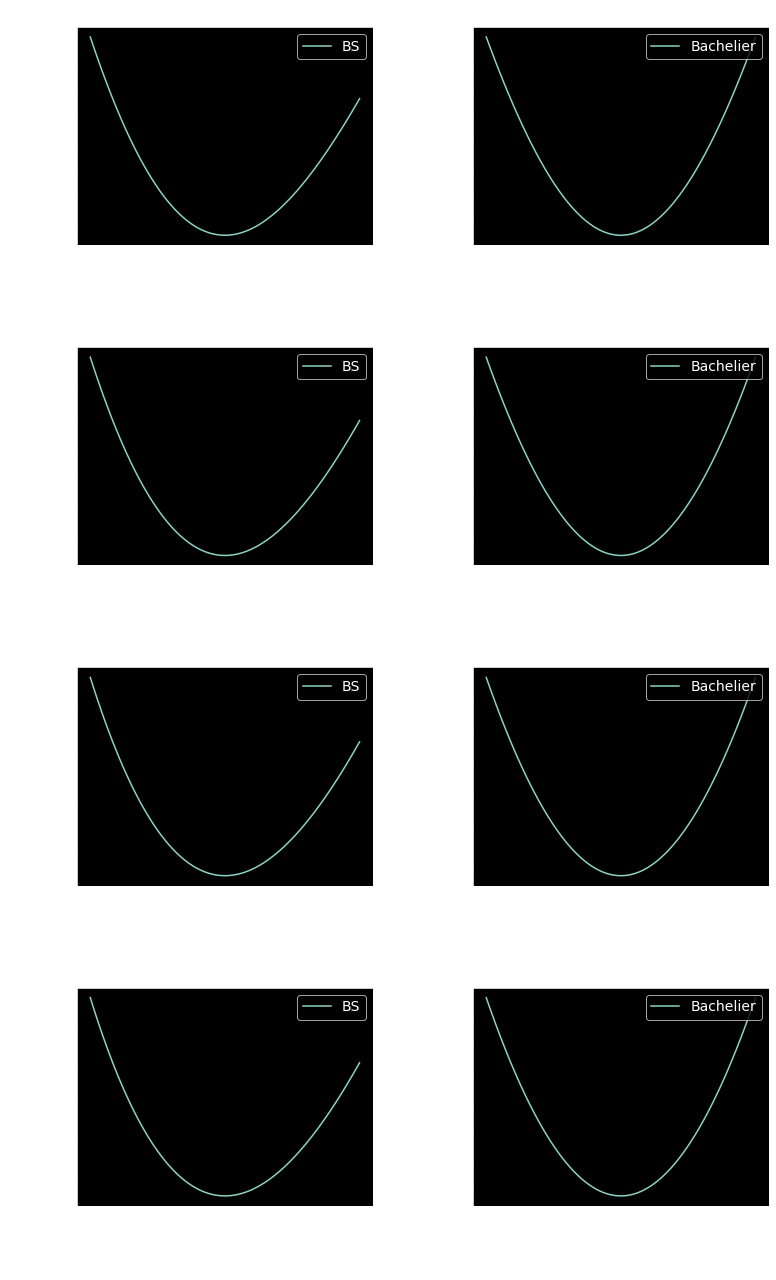

In [6]:
xlabel = 'strike\n\n'
ylabel = 'implied vol'
labels = ['BS', 'Bachelier']

T_expiries = [1.0, 5.0, 10.0, 20.0]

fig, axes = plt.subplots(nrows=4, ncols=2)

for i, ax_row in enumerate(axes):
    T_expiry = T_expiries[i]
    Model_BS.T_expiry = T_expiry
    Model_Bachelier.T_expiry = T_expiry
    x_grid = Model_BS.strike_grid

    models = [Model_BS, Model_Bachelier]
    for j, ax in enumerate(ax_row):
        model = models[j]
        label = labels[j]
        smile = list(model.smile.values())
        
        ax.plot(x_grid, smile, label=label)

        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.legend(loc='upper right')
        ax.set_title('expiry={}y'.format(T_expiry))
        ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
        ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
    
plt.tight_layout()
plt.show()